In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.txt', header=None)
iris.shape

(150, 5)

In [3]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
import random

In [5]:
iris_min = iris.iloc[:, :4].min()
iris_max = iris.iloc[:, :4].max()

In [6]:
iris_min

0    4.3
1    2.0
2    1.0
3    0.1
dtype: float64

In [7]:
iris_max

0    7.9
1    4.4
2    6.9
3    2.5
dtype: float64

In [8]:
iris_mid = (iris_min + iris_max) / 2

In [9]:
iris_mid

0    6.10
1    3.20
2    3.95
3    1.30
dtype: float64

In [10]:
iris_ran = (iris_max - iris_min) / 2

In [11]:
iris_ran

0    1.80
1    1.20
2    2.95
3    1.20
dtype: float64

In [12]:
np.random.random((2, 4))

array([[0.4275612 , 0.86050119, 0.50308548, 0.119909  ],
       [0.7865856 , 0.99848087, 0.26045469, 0.08286708]])

In [13]:
np.random.RandomState(123)
iris_cent_o = np.random.random((2, 4))

In [14]:
iris_cent_o

array([[0.79952214, 0.69494931, 0.51498062, 0.720589  ],
       [0.57178792, 0.71397083, 0.26737384, 0.94516717]])

In [15]:
iris_cent = (iris_cent_o - 0.5) * 2 * list(iris_ran) + list(iris_mid)

In [16]:
iris_cent

array([[7.1782797 , 3.66787833, 4.03838564, 1.82941361],
       [6.35843653, 3.71353   , 2.57750566, 2.36840121]])

In [17]:
def randCent(dataSet, k):
    n = dataSet.shape[1]
    data_min = dataSet.iloc[:, :n-1].min()
    data_max = dataSet.iloc[:, :n-1].max()
    data_mid = (data_min + data_max) / 2
    data_ran = (data_max - data_min) / 2
    data_cent_o = np.random.random((k, n-1))
    data_cent = (data_cent_o - 0.5) * 2 * list(data_ran) + list(data_mid)
    return data_cent

In [18]:
randCent(iris, 5)

array([[5.90223716, 2.40600675, 5.80371213, 0.17304287],
       [5.25797266, 2.14920858, 3.99454319, 1.44449153],
       [4.34409059, 2.81051236, 5.02931068, 0.38782841],
       [7.25351324, 2.08926701, 6.31483218, 2.40804552],
       [7.53691442, 3.10547696, 1.2930158 , 0.75031859]])

In [19]:
def distEclud(arrayA, arrayB):
    dist_o = arrayA - arrayB
    return np.sum(np.power(dist_o, 2), axis=1)

In [20]:
iris_cent

array([[7.1782797 , 3.66787833, 4.03838564, 1.82941361],
       [6.35843653, 3.71353   , 2.57750566, 2.36840121]])

In [21]:
iris.iloc[0, :4].values

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [22]:
distEclud(iris.iloc[0, :4].values, iris_cent)

array([13.963497141243352, 7.717740918544143], dtype=object)

In [23]:
dist_o = iris.iloc[0, :4].values -  iris_cent

In [24]:
dist_o

array([[-2.0782796976542492, -0.16787833345826408, -2.6383856429537924,
        -1.6294136073361156],
       [-1.2584365265610913, -0.2135300006482721, -1.17750565680995,
        -2.1684012069182943]], dtype=object)

In [25]:
np.power(dist_o, 2)

array([[4.319246501681838, 0.02818313484472411, 6.961078800944697,
        2.6549887037720934],
       [1.5836624913831443, 0.04559506117685108, 1.3865195718194319,
        4.701963794164715]], dtype=object)

In [26]:
np.sum(np.power(dist_o, 2), axis=1)

array([13.963497141243352, 7.717740918544143], dtype=object)

In [27]:
q = distEclud(iris.iloc[0, :4].values, iris_cent)

In [28]:
np.where(q == q.min())

(array([1]),)

In [29]:
np.where(q == q.min())[0][0]

1

In [30]:
iris_cent

array([[7.1782797 , 3.66787833, 4.03838564, 1.82941361],
       [6.35843653, 3.71353   , 2.57750566, 2.36840121]])

In [31]:
np.random.uniform(1, 2, size=(2, 4))

array([[1.36842302, 1.34777526, 1.86333158, 1.12884735],
       [1.49417507, 1.31922062, 1.64058889, 1.36776255]])

In [32]:
np.random.uniform?

Docstring:
uniform(low=0.0, high=1.0, size=None)

Draw samples from a uniform distribution.

Samples are uniformly distributed over the half-open interval
``[low, high)`` (includes low, but excludes high).  In other words,
any value within the given interval is equally likely to be drawn
by `uniform`.

Parameters
----------
low : float or array_like of floats, optional
    Lower boundary of the output interval.  All values generated will be
    greater than or equal to low.  The default value is 0.
high : float or array_like of floats
    Upper boundary of the output interval.  All values generated will be
    less than high.  The default value is 1.0.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``low`` and ``high`` are both scalars.
    Otherwise, ``np.broadcast(low, high).size`` samples are drawn.

Returns
-------
out : n

In [33]:
m = iris.shape[0]
n = iris.shape[1]
clusterAssment = np.zeros((m,3))
iris_cent

array([[7.1782797 , 3.66787833, 4.03838564, 1.82941361],
       [6.35843653, 3.71353   , 2.57750566, 2.36840121]])

In [34]:
clusterAssment[:, 0] = np.inf
clusterAssment[:, 1: 3] = -1

In [35]:
for i in range(m):
    dist = distEclud(iris.iloc[i, :n-1].values, iris_cent)
    clusterAssment[i, 0] = dist.min()
    clusterAssment[i, 1] = np.where(dist == dist.min())[0]

In [36]:
iris_cent

array([[7.1782797 , 3.66787833, 4.03838564, 1.82941361],
       [6.35843653, 3.71353   , 2.57750566, 2.36840121]])

In [37]:
dataSet = iris
m = dataSet.shape[0]
n = dataSet.shape[1]
centroids = randCent(dataSet, 3)

In [38]:
centroids

array([[7.77785149, 2.87925374, 4.37064088, 0.64947418],
       [6.53758233, 3.09396371, 2.49909981, 1.26304567],
       [5.26873599, 3.34243956, 1.78122087, 1.31773782]])

In [39]:
clusterAssment = np.zeros((m,3))
clusterAssment[:, 0] = np.inf
clusterAssment[:, 1: 3] = -1

In [40]:
result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)], axis=1, ignore_index = True)

In [41]:
result_set.head()

,0,1,2,3,4,5,6,7
0,5.1,3.5,1.4,0.2,Iris-setosa,inf,-1.0,-1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,inf,-1.0,-1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,inf,-1.0,-1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,inf,-1.0,-1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,inf,-1.0,-1.0


In [42]:
n

5

In [43]:
centroids

array([[7.77785149, 2.87925374, 4.37064088, 0.64947418],
       [6.53758233, 3.09396371, 2.49909981, 1.26304567],
       [5.26873599, 3.34243956, 1.78122087, 1.31773782]])

In [44]:
for i in range(m):
    dist = distEclud(dataSet.iloc[i, :n-1].values, centroids)
    result_set.iloc[i, n] = dist.min()
    result_set.iloc[i, n+1] = np.where(dist == dist.min())[0][0]

In [45]:
result_set.head()

,0,1,2,3,4,5,6,7
0,5.1,3.5,1.4,0.2,Iris-setosa,1.447964,2.0,-1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.647898,2.0,-1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.824661,2.0,-1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.834408,2.0,-1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.533224,2.0,-1.0


In [46]:
a = np.array([1, 2, 3])
b = 0
a > b

array([ True,  True,  True])

In [47]:
(a > b).any()

True

In [48]:
(a > b).all()

True

In [49]:
result_set.head()

,0,1,2,3,4,5,6,7
0,5.1,3.5,1.4,0.2,Iris-setosa,1.447964,2.0,-1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.647898,2.0,-1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.824661,2.0,-1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.834408,2.0,-1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.533224,2.0,-1.0


In [50]:
cent_df = result_set.groupby(n+1).mean()

In [51]:
cent_df

,0,1,2,3,5,7
6,,,,,,
0.0,6.534247,2.961644,5.263014,1.842466,4.680372,-1.0
1.0,5.591667,2.658333,4.033333,1.250000,3.696490,-1.0
2.0,5.005660,3.360377,1.562264,0.288679,1.715544,-1.0


In [52]:
centroids = cent_df.iloc[:,:n-1].values

In [53]:
centroids

array([[6.53424658, 2.96164384, 5.2630137 , 1.84246575],
       [5.59166667, 2.65833333, 4.03333333, 1.25      ],
       [5.00566038, 3.36037736, 1.56226415, 0.28867925]])

In [54]:
testSet = pd.read_table('testSet.txt', header=None)

In [55]:
testSet.head()

,0,1
0,1.658985,4.285136
1,-3.453687,3.424321
2,4.838138,-1.151539
3,-5.379713,-3.362104
4,0.972564,2.924086


In [56]:
testSet.shape

(80, 2)

In [57]:
ze = pd.DataFrame(np.zeros(80).reshape(-1, 1))
test_set = pd.concat([testSet, ze], axis=1, ignore_index = True)
test_set.head()

,0,1,2
0,1.658985,4.285136,0.0
1,-3.453687,3.424321,0.0
2,4.838138,-1.151539,0.0
3,-5.379713,-3.362104,0.0
4,0.972564,2.924086,0.0


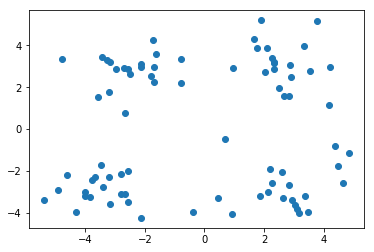

In [58]:
plt.plot(testSet.iloc[:,0], testSet.iloc[:,1], 'o')

In [59]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = dataSet.shape[0]
    n = dataSet.shape[1]
    centroids = createCent(dataSet, k)
    clusterAssment = np.zeros((m,3))
    clusterAssment[:, 0] = np.inf
    clusterAssment[:, 1: 3] = -1
    result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)], axis=1,
    ignore_index = True)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            dist = distMeas(dataSet.iloc[i, :n-1].values, centroids)
            result_set.iloc[i, n] = dist.min()
            result_set.iloc[i, n+1] = np.where(dist == dist.min())[0]
        clusterChanged = not (result_set.iloc[:, -1] == result_set.iloc[:, -2]).all()
        if clusterChanged:
            cent_df = result_set.groupby(n+1).mean()
            centroids = cent_df.iloc[:,:n-1].values
            result_set.iloc[:, -1] = result_set.iloc[:, -2]
    return centroids, result_set

In [60]:
test_cent, test_cluster = kMeans(test_set, 4)
test_cent

array([[ 2.65077367, -2.79019029],
       [-3.53973889, -2.89384326],
       [ 2.6265299 ,  3.10868015],
       [-2.46154315,  2.78737555]])

In [78]:
test_cluster.head()

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,1.932584,3.0,3.0
1,-3.453687,3.424321,0.0,1.390049,2.0,2.0
2,4.838138,-1.151539,0.0,6.638391,1.0,1.0
3,-5.379713,-3.362104,0.0,4.161410,0.0,0.0
4,0.972564,2.924086,0.0,2.552611,3.0,3.0


In [79]:
test_cluster.groupby(4).sum()

,0,1,2,3,5
4,,,,,
0.0,-67.647409,-58.946726,0.0,32.601243,0.0
1.0,56.058617,-54.630292,0.0,50.986227,20.0
2.0,-49.230863,55.747511,0.0,30.048349,40.0
3.0,52.530598,62.173603,0.0,36.672629,60.0


In [61]:
test_cluster.head()

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,2.320192,2.0,2.0
1,-3.453687,3.424321,0.0,1.390049,3.0,3.0
2,4.838138,-1.151539,0.0,7.469741,0.0,0.0
3,-5.379713,-3.362104,0.0,3.604773,1.0,1.0
4,0.972564,2.924086,0.0,2.769678,2.0,2.0


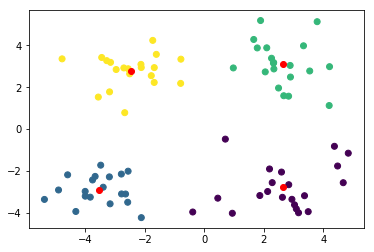

In [62]:
plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
plt.plot(test_cent[:, 0], test_cent[:, 1], 'o', color='red')

In [63]:
test_cluster.iloc[:, 3].sum()

150.62604907269227

In [64]:
def kcLearningCurve(dataSet, cluster = kMeans, k=10):
    n = dataSet.shape[1]
    SSE = []
    for i in range(1, k):
        centroids, result_set = cluster(dataSet, i+1)
        SSE.append(result_set.iloc[:,n].sum())
    plt.plot(range(2, k+1), SSE, '--o')
    return SSE

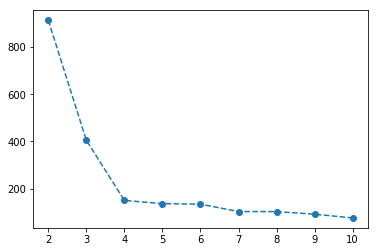

In [65]:
test_SSE = kcLearningCurve(test_set)

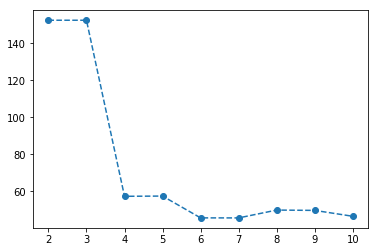

In [66]:
test_SSE = kcLearningCurve(iris)

463.6496809222772
506.0588518418539
405.13810196190366
405.13810196190366


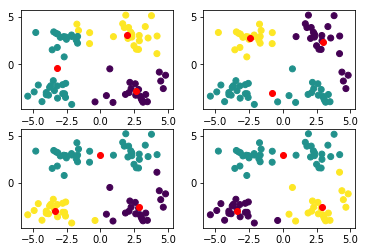

In [67]:
np.random.seed(123)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    test_cent, test_cluster = kMeans(test_set, 3)
    plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
    plt.plot(test_cent[:, 0], test_cent[:, 1], 'o', color='red')
    print(test_cluster.iloc[:, 3].sum())

438.99925511275205
149.95430467642635
149.95430467642635
150.62604907269227


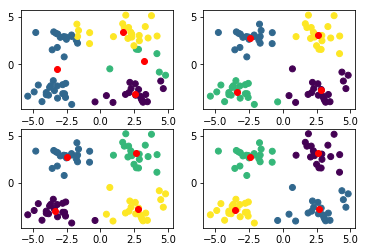

In [68]:
np.random.seed(123)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    test_cent, test_cluster = kMeans(test_set, 4)
    plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
    plt.plot(test_cent[:, 0], test_cent[:, 1], 'o', color='red')
    print(test_cluster.iloc[:, 3].sum())

132.51859467191917
134.72812560240237
134.4631443966685
131.89160568812764


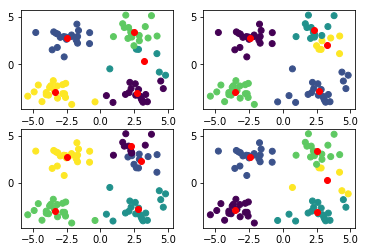

In [69]:
np.random.seed(123)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    test_cent, test_cluster = kMeans(test_set, 5)
    plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
    plt.plot(test_cent[:, 0], test_cent[:, 1], 'o', color='red')
    print(test_cluster.iloc[:, 3].sum())

In [70]:
def kMeans_assment(dataSet, centroids, distMeas = distEclud):
    m = dataSet.shape[0]
    n = dataSet.shape[1]
    clusterAssment = np.zeros((m,3))
    clusterAssment[:, 0] = np.inf
    clusterAssment[:, 1: 3] = -1
    result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)], axis=1,
    ignore_index = True)
    for i in range(m):
        dist = distMeas(dataSet.iloc[i, :n-1].values, centroids)
        result_set.iloc[i, n] = dist.min()
        result_set.iloc[i, n+1] = np.where(dist == dist.min())[0]
        result_set.iloc[:, -1] = result_set.iloc[:, -2]
    return result_set

In [72]:
def biKmeans(dataSet, k, distMeas = distEclud):
    m = dataSet.shape[0]
    n = dataSet.shape[1]
    centroids, result_set = kMeans(dataSet, 2)
    j = 2
    while j < k:
        result_tmp = result_set.groupby(n+1).sum()
        clusterAssment = pd.concat([pd.DataFrame(centroids),
        result_tmp.iloc[:,n]], axis = 1, ignore_index = True)
        lowestSSE = clusterAssment.iloc[:, n-1].sum()
        centList = []
        sseTotle = np.array([])
        for i in clusterAssment.index:
            df_temp = result_set.iloc[:, :n][result_set.iloc[:, -1] == i]
            df_temp.index = range(df_temp.shape[0])
            cent, res = kMeans(df_temp, 2, distMeas)
            centList.append(cent)
            sseSplit = res.iloc[:, n].sum()
            sseNotSplit = result_set.iloc[:, n][result_set.iloc[:, -1] !=
            i].sum()
            sseTotle = np.append(sseTotle, sseSplit + sseNotSplit)
        min_index = np.where(sseTotle == sseTotle.min())[0][0]
        clusterAssment = clusterAssment.drop([min_index])
        centroids = np.vstack([clusterAssment.iloc[:, :n-1].values,
        centList[min_index]])
        result_set = kMeans_assment(dataSet, centroids)
        j = j + 1
    return centroids, result_set

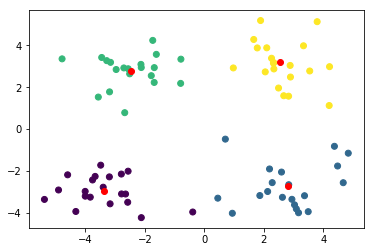

In [77]:
test_cent, test_cluster = biKmeans(test_set, 4)
plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
plt.plot(test_cent[:, 0], test_cent[:, 1], 'o', color='red')

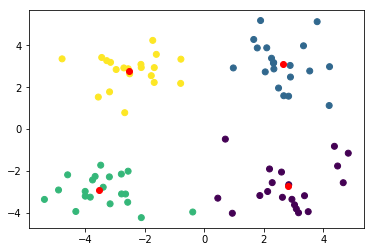

In [76]:
test_cent, test_cluster = biKmeans(test_set, 4)
plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
plt.plot(test_cent[:, 0], test_cent[:, 1], 'o', color='red')

In [81]:
test_set.head()

,0,1,2
0,1.658985,4.285136,0.0
1,-3.453687,3.424321,0.0
2,4.838138,-1.151539,0.0
3,-5.379713,-3.362104,0.0
4,0.972564,2.924086,0.0


In [82]:
dataSet = test_set

In [83]:
m = dataSet.shape[0]
n = dataSet.shape[1]

In [84]:
centroids, result_set = kMeans(dataSet, 2)

In [91]:
centroids

array([[-2.9219568 , -0.07998038],
       [ 2.71473038,  0.18858278]])

In [85]:
j = 2

In [88]:
result_set.head()

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,17.896347,1.0,1.0
1,-3.453687,3.424321,0.0,12.562865,0.0,0.0
2,4.838138,-1.151539,0.0,6.304786,1.0,1.0
3,-5.379713,-3.362104,0.0,16.812901,0.0,0.0
4,0.972564,2.924086,0.0,10.518122,1.0,1.0


In [89]:
result_tmp = result_set.groupby(n+1).sum()

In [90]:
result_tmp.head()

,0,1,2,3,5
4,,,,,
0.0,-116.878272,-3.199215,0.0,399.998021,0.0
1.0,108.589215,7.543311,0.0,428.694633,40.0


In [93]:
clusterAssment = pd.concat([pd.DataFrame(centroids),result_tmp.iloc[:,n]], axis = 1, ignore_index = True)

In [94]:
clusterAssment

,0,1,2
0,-2.921957,-0.079980,399.998021
1,2.714730,0.188583,428.694633


In [95]:
lowestSSE = clusterAssment.iloc[:, n-1].sum()

In [96]:
lowestSSE

828.6926539968681

In [97]:
centList = []

In [98]:
sseTotle = np.array([])

In [101]:
df_temp = result_set.iloc[:, :n][result_set.iloc[:, -1] == 0]

In [102]:
df_temp.index = range(df_temp.shape[0])

In [103]:
cent, res = kMeans(df_temp, 2, distEclud)

In [106]:
centList.append(cent)

In [107]:
sseSplit = res.iloc[:, n].sum()

In [108]:
sseSplit

62.649592026534656

In [113]:
sseNotSplit = result_set.iloc[:, n][result_set.iloc[:, -1] != 0].sum()

In [114]:
sseTotle = np.append(sseTotle, sseSplit + sseNotSplit)

In [116]:
df_temp = result_set.iloc[:, :n][result_set.iloc[:, -1] == 1]
df_temp.index = range(df_temp.shape[0])
cent, res = kMeans(df_temp, 2, distEclud)
centList.append(cent)
sseSplit = res.iloc[:, n].sum()
sseNotSplit = result_set.iloc[:, n][result_set.iloc[:, -1] !=1].sum()
sseTotle = np.append(sseTotle, sseSplit + sseNotSplit)

In [117]:
sseTotle

array([491.34422481, 487.30273387])

In [118]:
min_index = np.where(sseTotle == sseTotle.min())[0][0]

In [119]:
min_index

1

In [120]:
clusterAssment

,0,1,2
0,-2.921957,-0.079980,399.998021
1,2.714730,0.188583,428.694633


In [121]:
clusterAssment = clusterAssment.drop([min_index])
clusterAssment

,0,1,2
0,-2.921957,-0.07998,399.998021


In [122]:
centList[min_index]

array([[ 2.6265299 ,  3.10868015],
       [ 2.80293085, -2.7315146 ]])

In [123]:
centroids = np.vstack([clusterAssment.iloc[:, :n-1].values, centList[min_index]])

In [124]:
centroids

array([[-2.9219568 , -0.07998038],
       [ 2.6265299 ,  3.10868015],
       [ 2.80293085, -2.7315146 ]])

In [125]:
result_set = kMeans_assment(dataSet, centroids)

In [126]:
j = j + 1